In [1]:
import numpy as np
import pandas as pd
import datetime 


In [2]:
df = pd.read_csv('dataset/Flight/831394006_T_ONTIME.csv', parse_dates= ['FL_DATE'])

In [3]:
df.head(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                450017 non-null  datetime64[ns]
 1   UNIQUE_CARRIER         450017 non-null  object        
 2   AIRLINE_ID             450017 non-null  int64         
 3   TAIL_NUM               449378 non-null  object        
 4   FL_NUM                 450017 non-null  int64         
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64         
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64         
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64         
 8   ORIGIN                 450017 non-null  object        
 9   ORIGIN_CITY_NAME       450017 non-null  object        
 10  DEST_AIRPORT_ID        450017 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64         
 12  DEST_CITY_MARKET_ID    450017 non-null  int6

In [4]:
dictionary = {}
missing_data = pd.DataFrame(columns = ['Name' ,'Counter', 'Percentage'])
for column in df.columns:
    new_row = {'Name': column, 'Counter':df[column].isna().sum(), 'Percentage':  100*df[column].isna().sum()/ df.shape[0]}
    
    missing_data = missing_data.append(new_row, ignore_index= True)
    
missing_data


,Name,Counter,Percentage
0,FL_DATE,0,0.000000
1,UNIQUE_CARRIER,0,0.000000
2,AIRLINE_ID,0,0.000000
3,TAIL_NUM,639,0.141995
4,FL_NUM,0,0.000000
5,ORIGIN_AIRPORT_ID,0,0.000000
6,ORIGIN_AIRPORT_SEQ_ID,0,0.000000
7,ORIGIN_CITY_MARKET_ID,0,0.000000
8,ORIGIN,0,0.000000
9,ORIGIN_CITY_NAME,0,0.000000


In [5]:
print(f"There are {df['UNIQUE_CARRIER'].nunique(dropna = True)} different Unique_Carrier")
print(f"There are {df['FL_DATE'].nunique(dropna = True)} different FL_DATE")

There are 12 different Unique_Carrier
There are 31 different FL_DATE


In [6]:
df.sort_values(by = 'FL_DATE').iloc[[0,-1]]

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN
450016,2017-01-31,NK,20416,N613NK,604,11697,1169704,32467,FLL,"Fort Lauderdale, FL",...,1003.0,-12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop caneclled flight
df = df.drop(df[df['CANCELLED']==1].index)
df[df['CANCELLED']==1]

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32


### 4- how many flights had each carrier operated? 

In [8]:
df.groupby('UNIQUE_CARRIER').count()['FL_DATE']

UNIQUE_CARRIER
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: FL_DATE, dtype: int64

In [9]:
#MEAN?
df.groupby('UNIQUE_CARRIER').mean()

,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
AA,19805.0,1410.829305,12663.502536,1.266353e+06,31574.143128,12663.641604,1.266367e+06,31574.813560,1314.908000,1318.717638,...,1524.938089,1505.711557,3.307004,0.0,18.736410,2.352168,15.370026,0.178156,18.742267,NaN
AS,19930.0,446.849453,13583.272935,1.358330e+06,31771.837000,13585.898436,1.358593e+06,31774.345856,1322.049882,1319.223052,...,1500.713574,1473.943341,3.311553,0.0,11.736505,3.820850,18.615047,0.169028,19.189946,NaN
B6,20409.0,952.359929,12527.736014,1.252776e+06,31966.083233,12527.823940,1.252785e+06,31966.137974,1369.503177,1353.445903,...,1450.132159,1425.727809,8.423231,0.0,20.297641,1.436562,15.223725,0.312820,29.282627,NaN
DL,19790.0,1561.194623,12271.877084,1.227191e+06,31652.092335,12271.461141,1.227149e+06,31652.008445,1326.312541,1327.697440,...,1512.160681,1484.198371,4.305279,0.0,30.858959,9.572160,16.836252,0.033901,21.964020,NaN
EV,20366.0,4413.665771,12276.019216,1.227605e+06,31559.449554,12277.386298,1.227742e+06,31561.616920,1312.821182,1331.048557,...,1480.705945,1476.833195,13.173011,0.0,36.329407,1.368504,15.794439,0.000000,31.725109,NaN
F9,20436.0,1041.761779,12764.175573,1.276420e+06,31672.925243,12764.996446,1.276502e+06,31674.135430,1368.448671,1354.770203,...,1516.536325,1456.529497,12.076791,0.0,16.748299,0.870295,19.070295,0.000000,31.091610,NaN
HA,19690.0,226.897731,12816.050815,1.281607e+06,32652.422020,12815.271652,1.281529e+06,32651.527005,1301.348354,1302.948066,...,1430.886865,1420.531405,3.617181,0.0,29.941714,0.897143,0.251429,0.122286,14.113143,NaN
NK,20416.0,541.899497,12529.408855,1.252944e+06,31715.463682,12530.951439,1.253098e+06,31716.599060,1351.532938,1352.752659,...,1519.076181,1461.322357,8.993642,0.0,9.080825,0.732499,43.840041,0.035171,12.137978,NaN
OO,20304.0,4875.851718,13114.223097,1.311425e+06,32082.654146,13114.555298,1.311458e+06,32084.241744,1322.660589,1339.594228,...,1485.568703,1484.457945,12.528524,0.0,23.495640,4.633053,15.186582,0.100759,31.316244,NaN


In [10]:
df['Day of week'] = df['FL_DATE'].dt.dayofweek
df['Day'] = df['FL_DATE'].dt.day_name()
df['delaydelta'] = df['ARR_DELAY'] - df['DEP_DELAY']
df

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32,Day of week,Day,delaydelta
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,NaN,27.0,0.0,0.0,0.0,0.0,NaN,6,Sunday,-4.0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,NaN,34.0,0.0,8.0,0.0,0.0,NaN,6,Sunday,8.0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,NaN,7.0,0.0,0.0,0.0,35.0,NaN,6,Sunday,-9.0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,NaN,77.0,0.0,20.0,0.0,0.0,NaN,6,Sunday,20.0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,NaN,0.0,0.0,42.0,0.0,0.0,NaN,6,Sunday,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450012,2017-01-31,NK,20416,N625NK,596,11697,1169704,32467,FLL,"Fort Lauderdale, FL",...,NaN,0.0,0.0,62.0,0.0,0.0,NaN,1,Tuesday,13.0
450013,2017-01-31,NK,20416,N613NK,597,13487,1348702,31650,MSP,"Minneapolis, MN",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Tuesday,-18.0
450014,2017-01-31,NK,20416,N505NK,600,10397,1039705,30397,ATL,"Atlanta, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Tuesday,1.0
450015,2017-01-31,NK,20416,N505NK,600,11697,1169704,32467,FLL,"Fort Lauderdale, FL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Tuesday,-19.0


In [11]:
import matplotlib.pyplot as plt

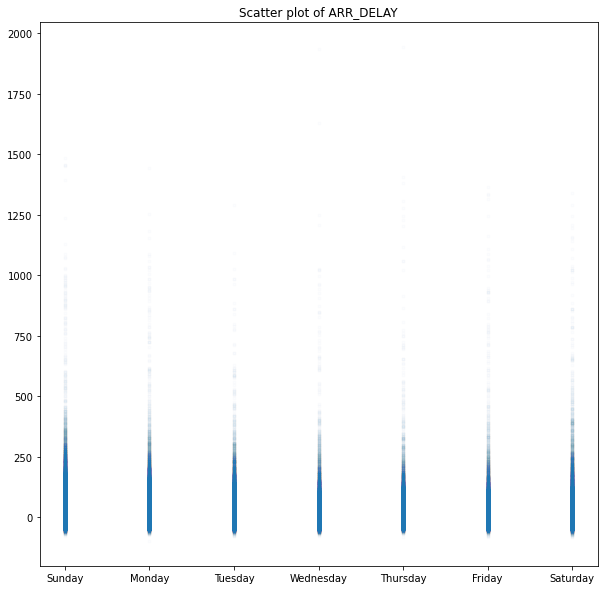

In [12]:
plt.figure(figsize = [10,10])
plt.scatter(df['Day'], df['ARR_DELAY'], marker =  ".", alpha = 0.01)
plt.title('Scatter plot of ARR_DELAY')
plt.show()

### 2.2.7

In [13]:
#plt.bar(df[df['Day of week']==0]['ARR_DELAY'],df[df['Day of week']==0]['ARR_DELAY'].count())
mean_delay = df.groupby(['UNIQUE_CARRIER','Day']).mean()['ARR_DELAY']
carrier_list = set(df['UNIQUE_CARRIER'])

for carrier in carrier_list:
    print(f"{carrier} :\n\tSaturday:{mean_delay[carrier]['Saturday']}\n\tSunday:{mean_delay[carrier]['Sunday']}")

B6 :
	Saturday:12.001898974553741
	Sunday:18.823759791122715
WN :
	Saturday:3.3039691091954024
	Sunday:8.716154472053576
OO :
	Saturday:7.208863356585966
	Sunday:11.27466702908399
VX :
	Saturday:4.3352713178294575
	Sunday:21.40340909090909
NK :
	Saturday:6.157571623465212
	Sunday:14.073158165893869
DL :
	Saturday:23.544368600682596
	Sunday:23.250942848854077
F9 :
	Saturday:3.518867924528302
	Sunday:11.655116841257051
AS :
	Saturday:-0.9960136674259681
	Sunday:11.40096195889812
EV :
	Saturday:17.57677642980936
	Sunday:17.601550079491258
UA :
	Saturday:0.27601924537857686
	Sunday:10.89012836185819
AA :
	Saturday:4.184056867225184
	Sunday:7.764121062818933
HA :
	Saturday:6.437046004842615
	Sunday:4.578999018645731


## 2.2.8 - 2.2.9   DF_multi index


In [40]:
#multi_df = df.groupby(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
m_df = df.set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
m_df.loc[['AA','DL'],'LAX',:,:][['DEP_TIME','DEP_DELAY']]

DEP_TIME  DEP_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                        
AA             LAX    JFK  2017-01-01     934.0       34.0
                           2017-01-01    1221.0       51.0
                           2017-01-01    2100.0        0.0
                           2017-01-01    1346.0        6.0
                           2017-01-01    2202.0        2.0
...                                         ...        ...
DL             LAX    SLC  2017-01-31    1144.0       -1.0
                      BNA  2017-01-31    1037.0       -3.0
                      IND  2017-01-31    2238.0       -2.0
                      PDX  2017-01-31    1242.0       12.0
                      ATL  2017-01-31    2337.0        2.0

[5437 rows x 2 columns]

In [15]:
#2.2.10 non riesco ad estrarre la settimana
#df['Week'] = df['FL_DATE'].date_range(end='2017-01-15')
#df['Week']

In [16]:
counter = df.pivot_table(index="UNIQUE_CARRIER", columns="Day", aggfunc = "count")['DEP_TIME']
mean_arrival_delay = df.pivot_table(index="UNIQUE_CARRIER", columns="Day", aggfunc= "mean")['ARR_DELAY']

In [18]:
mean_arrival_delay

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
UNIQUE_CARRIER,,,,,,,
AA,2.849597,6.166653,4.184057,7.764121,1.167107,0.899956,-0.733742
AS,1.041602,1.744243,-0.996014,11.400962,4.365145,-0.795982,5.797327
B6,4.651251,12.745117,12.001899,18.823760,-0.285054,7.053235,1.656450
DL,-2.084867,5.652933,23.544369,23.250943,-4.369801,-4.535590,-5.432658
EV,9.070754,22.496612,17.576776,17.601550,8.576665,10.791889,5.689274
F9,9.160569,23.677445,3.518868,11.655117,11.303772,13.563380,8.149744
HA,8.109954,2.127660,6.437046,4.578999,1.624220,1.141969,1.416984
NK,6.500963,15.736303,6.157572,14.073158,7.838409,7.421534,2.780186
OO,12.453080,17.011347,7.208863,11.274667,15.675984,11.123554,10.783691


In [ ]:
#df[df['ARR_DELAY'] < 0] flight that arrived before the scheduled time

## 2.2.13 

In [19]:
 result = df.pivot_table(index = "UNIQUE_CARRIER", columns= "Day", aggfunc="mean")['delaydelta']

In [20]:
res = result.loc[['AA','HA','DL', 'AS']]

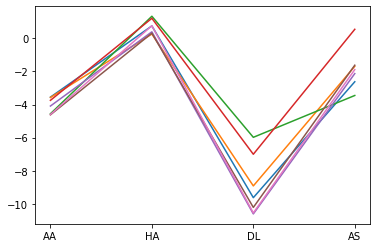

In [21]:
plt.plot(res)

## Extended from point 2.2.8 with Multi Index 

In [42]:
ix = [df['UNIQUE_CARRIER'], df['ORIGIN'], df['DEST'], df['FL_DATE']]
data = pd.DataFrame(df, index = ix, columns = [df['FL_DATE']])
data.head(3)

MemoryError: Unable to allocate 1.42 TiB for an array with shape (441131, 441131) and data type float64

In [41]:
data2 = df.set_index(ix)
data2.head(3)

FL_DATE UNIQUE_CARRIER  AIRLINE_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                            
AA             JFK    LAX  2017-01-01 2017-01-01             AA       19805   
               LAX    JFK  2017-01-01 2017-01-01             AA       19805   
                           2017-01-01 2017-01-01             AA       19805   

                                      TAIL_NUM  FL_NUM  ORIGIN_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                          
AA             JFK    LAX  2017-01-01   N787AA       1              12478   
               LAX    JFK  2017-01-01   N783AA       2              12892   
                           2017-01-01   N791AA       4              12892   

                                       ORIGIN_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             JFK    LAX  2017-01-01                1247803   
               LAX    JFK  2017-01-01                1289204   
                           2017-01-01                1289204   

                                       ORIGIN_CITY_MARKET_ID ORIGIN  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                    
AA             JFK    LAX  2017-01-01                  31703    JFK   
               LAX    JFK  2017-01-01                  32575    LAX   
                           2017-01-01                  32575    LAX   

                                      ORIGIN_CITY_NAME  ...  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                      ...   
AA             JFK    LAX  2017-01-01     New York, NY  ...   
               LAX    JFK  2017-01-01  Los Angeles, CA  ...   
                           2017-01-01  Los Angeles, CA  ...   

                                       CANCELLATION_CODE  CARRIER_DELAY  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                        
AA             JFK    LAX  2017-01-01                NaN           27.0   
               LAX    JFK  2017-01-01                NaN           34.0   
                           2017-01-01                NaN            7.0   

                                       WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                              
AA             JFK    LAX  2017-01-01            0.0       0.0            0.0   
               LAX    JFK  2017-01-01            0.0       8.0            0.0   
                           2017-01-01            0.0       0.0            0.0   

                                       LATE_AIRCRAFT_DELAY  Unnamed: 32  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                        
AA             JFK    LAX  2017-01-01                  0.0          NaN   
               LAX    JFK  2017-01-01                  0.0          NaN   
                           2017-01-01                 35.0          NaN   

                                       Day of week     Day  delaydelta  
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                      
AA             JFK    LAX  2017-01-01            6  Sunday        -4.0  
               LAX    JFK  2017-01-01            6  Sunday         8.0  
                           2017-01-01            6  Sunday        -9.0  

[3 rows x 36 columns]